In [40]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams.update({'font.size': 8})

In [41]:
def process_rewards_data(env_path, N=20):
    data = []
    min_size = np.inf
    for path in glob.glob(env_path + '*/'):
        data_set = pickle.load(open(path + 'reward_data.pkl', 'rb'),encoding="bytes")

        data_set = np.stack(data_set)
        if data_set[-1,0] < min_size:
            min_size = data_set[-1,0]
        best_data = []
        best_rew = -np.inf
        for x in data_set[:,1]:
            if x > best_rew:
                best_rew = x
            best_data.append(best_rew)
#         data.append(data_set[:60,1])
        data.append(best_data[:60])

        
    
#     x_samples = np.linspace(0, min_size, N)
#     interp_data = []
#     for data_set in data:
#         _x = data_set[:,0]
#         _y = data_set[:,1]

#         interp_data.append(np.interp(x_samples, _x, _y))
#     x_samples = np.arange(60)
#     interp_data = data
#     mean = np.mean(interp_data, axis=0)
#     std  = np.std(interp_data, axis=0)

#     data_log = {'x' : x_samples, 'mean' : mean, 'std' : std, 
#                 'max' : np.max(interp_data, axis=0),
#                 'min' : np.min(interp_data, axis=0),
#                 '-std' : mean-std,
#                 '+std' : mean+std, 'data' : interp_data}
    
    return data

def process_success_data(env_path, N=20):
    data = []
    min_size = np.inf
    for path in glob.glob(env_path + '*/'):
        raw_data_set = pickle.load(open(path + 'success_data.pkl', 'rb'),encoding="bytes")
        # [frame_idx, ep_num, episode_success,reward]
        
        raw_data_set = np.stack(raw_data_set)
        if raw_data_set[-1,0] < min_size:
            min_size = raw_data_set[-1,0]
            
        data_set = np.zeros((60,2))
        for i in range(60): 
            data_set[i,0] = raw_data_set[i,1]
            data_set[i,1] = np.sum(raw_data_set[:(i+1),2])#(i+1)
        data.append(data_set) 
        
#     x_samples = np.linspace(0, min_size, N)
#     interp_data = []
#     for data_set in data:
#         _x = data_set[:,0]
#         _y = data_set[:,1]

#         interp_data.append(np.interp(x_samples, _x, _y))
        
#     mean = np.mean(interp_data, axis=0)
#     std  = np.std(interp_data, axis=0)

#     data_log = {'x' : x_samples, 'mean' : mean, 'std' : std, 
#                 'max' : np.max(interp_data, axis=0),
#                 'min' : np.min(interp_data, axis=0),
#                 '-std' : mean-std,
#                 '+std' : mean+std, 'data' : interp_data}
#     data = np.mean(data,axis=0)

    return data


def plot_data(ax, log, label):
    ax.plot(log['x'], log['mean'], label=label)
    ax.fill_between(log['x'], 
                    log['-std'], log['+std'],
                    alpha=0.2)

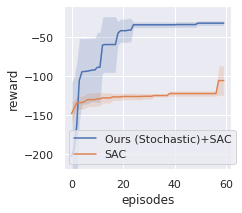

In [50]:
plt.figure(figsize=(3,3))

hsac_mean = np.mean(hsac_data, axis=0)
hsac_std = np.std(hsac_data, axis=0)
x = [i for i in range(len(hsac_mean))]
plt.plot(x, hsac_mean, label='Ours (Stochastic)+SAC')
plt.fill_between(x,
                    hsac_mean - hsac_std,
                     hsac_mean + hsac_std,
                 alpha=0.2
                )
sac_mean = np.mean(sac_data, axis=0)
sac_std = np.std(sac_data, axis=0)
x = [i for i in range(len(sac_mean))]
plt.plot(x, sac_mean, label='SAC')
plt.fill_between(x,
                    sac_mean - sac_std,
                    sac_mean + sac_std,
                 alpha=0.2
                )
plt.ylim(-220, -10)

plt.ylabel('reward')
plt.xlabel('episodes')
plt.legend()
plt.savefig('sawyer_results.pdf')

In [54]:
100 * 0.1 * 20 / 60.

3.3333333333333335

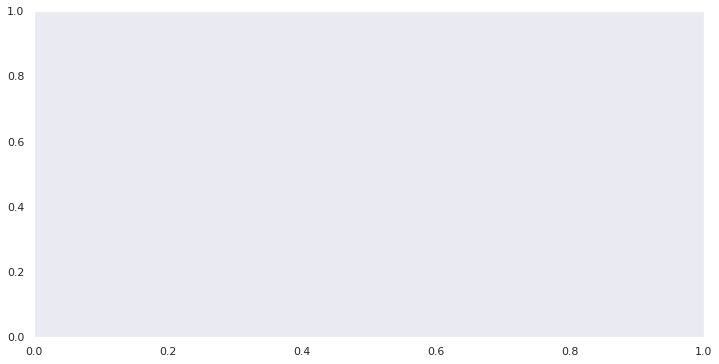

In [38]:
fig, axs = plt.subplots(1, 1, figsize=(12,6))

hsac_data = process_rewards_data('./sawyer/h_sac/')
sac_data = process_rewards_data('./sawyer/sac/')

[[-249.49875376164346, -200.38146638743518, -165.60173405723734, -131.45629676491075, -131.48543234116937, -128.65831322289964, -131.14777281309296, -137.62654499237632, -124.30002673458773, -131.41813720046648, -207.58039458985155, -130.42180568000802, -74.6333214346873, -70.93489966496674, -169.49361241745544, -127.3165379394964, -129.3514201324663, -124.04407266480662, -116.10368935104736, -125.23555988845133, -127.07306957556891, -130.11030372870184, -125.61813675143334, -127.80379679783121, -36.33578685768529, -117.30301493385267, -61.88417586637759, -126.14766934996942, -189.66349065363337, -125.25291941595195, -123.52893099496337, -132.35598658325887, -78.99785418177306, -194.4540656414447, -123.97079618208654, -133.7268867800908, -99.97407177470987, -130.67322414939494, -127.59343540535632, -135.0342596788772, -141.2093877193526, -62.824072638426685, -124.10532212541708, -125.31729143555329, -133.0137927808578, -155.48271862468016, -123.53857901283678, -123.45984230068325, -122

TypeError: unsupported operand type(s) for /: 'list' and 'int'

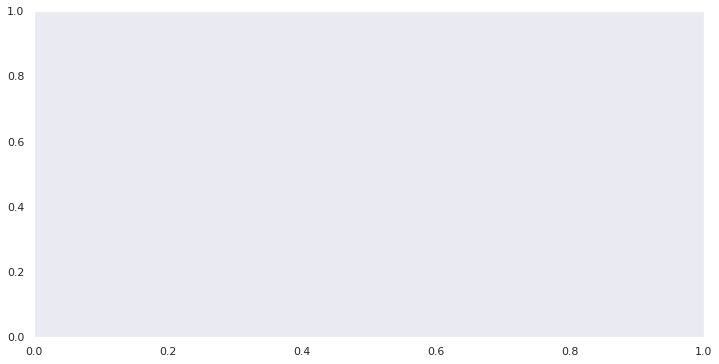

In [9]:
plot_data(axs, hsac_data, 'H-Det+SAC (Ours)')
plot_data(axs, sac_data, 'SAC')

axs.set_title('Sawyer: Block Pusher', fontsize=10)

axs.tick_params(axis='both', which='major', labelsize=8)
axs.set_xlabel('time steps', fontsize=10)
axs.set_ylabel('episode reward', fontsize=10)
axs.legend(fontsize=8)

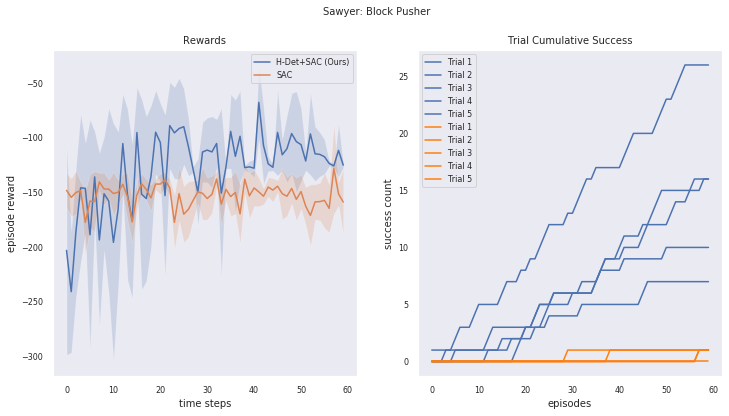

In [264]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

hsac_data = process_rewards_data('./sawyer/h_sac/')
sac_data = process_rewards_data('./sawyer/sac/')
hsac_success = process_success_data('./sawyer/h_sac/')
sac_success = process_success_data('./sawyer/sac/')

plot_data(axs[0], hsac_data, 'H-Det+SAC (Ours)')
plot_data(axs[0], sac_data, 'SAC')

fig.suptitle('Sawyer: Block Pusher', fontsize=10)
axs[0].set_title('Rewards', fontsize=10)

axs[0].tick_params(axis='both', which='major', labelsize=8)
axs[0].set_xlabel('time steps', fontsize=10)
axs[0].set_ylabel('episode reward', fontsize=10)
axs[0].legend(fontsize=8)

count = 0
for i in hsac_success:
    count +=1
    plt.plot(i[:,0],i[:,1],'b',label='Trial {}'.format(count))
count = 0
for i in sac_success:
    count +=1
    plt.plot(i[:,0],i[:,1],'tab:orange',label='Trial {}'.format(count))

axs[1].set_title('Trial Cumulative Success', fontsize=10)

axs[1].tick_params(axis='both', which='major', labelsize=8)
axs[1].set_xlabel('episodes', fontsize=10)
axs[1].set_ylabel('success count', fontsize=10)
axs[1].legend(fontsize=8)
